###British Airways Reviews Analysis

The reviews will be scraped from the "https://www.airlinequality.com/airline-reviews/british-airways" website. I have decided to scrape not just reviews but also ratings and other features that might be useful for gaining insights.  

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

overall_rating = []
review_text = []
aircraft = []
type_traveller = []
seat_type = []
seat_comf = []
service = []
food = []
entertainment = []
ground_service = []
internet = []
value_money = []
recommended = []

In [ ]:
for i in range(1, pages + 1):

    print(f"Scraping page {i}")


    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for review in parsed_content.find_all("article", itemprop = "review"):

        rating_div = review.find("div", class_ = "rating-10")
        rate_val = rating_div.get_text(strip=True)
        overall_rating.append(float(rate_val.split('/')[0]))


        reviews = review.find("div", class_ = "text_content")
        review_text.append(reviews.get_text(strip=True))


        aircraft_hd = review.find("td", class_ = "review-rating-header aircraft")
        if aircraft_hd:
            aircraft_type = aircraft_hd.find_next_sibling("td")
            aircraft.append(aircraft_type.get_text(strip=True))
        else:
            aircraft.append(float('nan'))

        traveller_hd = review.find("td", class_= "review-rating-header type_of_traveller")
        if traveller_hd:
            traveller_type = traveller_hd.find_next_sibling("td")
            type_traveller.append(traveller_type.get_text(strip=True))
        else:
            type_traveller.append(float('nan'))

        seat_hd = review.find("td", class_= "review-rating-header cabin_flown")
        if seat_hd:
            seat = seat_hd.find_next_sibling("td")
            seat_type.append(seat.get_text(strip=True))
        else:
            seat_type.append(float('nan'))

        seat_comfort_hd = review.find("td", class_="review-rating-header seat_comfort")
        if seat_comfort_hd:
            seat_comfort_rating = seat_comfort_hd.find_next_sibling("td")
            seat_comfort = len(seat_comfort_rating.find_all("span", class_="star fill"))
            seat_comf.append(seat_comfort)
        else:
            seat_comf.append(float('nan'))

        service_hd = review.find("td", class_="review-rating-header cabin_staff_service")
        if service_hd:
            service_rating = service_hd.find_next_sibling("td")
            service_cabin = len(service_rating.find_all("span", class_="star fill"))
            service.append(service_cabin)
        else:
            service.append(float('nan'))

        food_rating_hd = review.find("td", class_="review-rating-header food_and_beverages")
        if food_rating_hd:
            food_rating = food_rating_hd.find_next_sibling("td")
            food_bev = len(food_rating.find_all("span", class_="star fill"))
            food.append(food_bev)
        else:
            food.append(float('nan'))

        entertainment_hd = review.find("td", class_="review-rating-header inflight_entertainment")
        if entertainment_hd:
            entertainment_rating = entertainment_hd.find_next_sibling("td")
            entertainment_infl = len(entertainment_rating.find_all("span", class_="star fill"))
            entertainment.append(entertainment_infl)
        else:
            entertainment.append(float('nan'))

        ground_ser_hd = review.find("td", class_="review-rating-header ground_service")
        if ground_ser_hd:
            ground_ser_rating = ground_ser_hd.find_next_sibling("td")
            ground_ser = len(ground_ser_rating.find_all("span", class_="star fill"))
            ground_service.append(ground_ser)
        else:
            ground_service.append(float('nan'))

        internet_hd = review.find("td", class_="review-rating-header wifi_and_connectivity")
        if internet_hd:
            internet_rating = internet_hd.find_next_sibling("td")
            internet_connectivity = len(internet_rating.find_all("span", class_="star fill"))
            internet.append(internet_connectivity)
        else:
            internet.append(float('nan'))

        value_hd = review.find("td", class_="review-rating-header value_for_money")
        if value_hd:
            value_rating = value_hd.find_next_sibling("td")
            value_for_money = len(value_rating.find_all("span", class_="star fill"))
            value_money.append(value_for_money)
        else:
            value_money.append(float('nan'))

        recomm_hd = review.find("td", class_ = "review-rating-header recommended")
        if recomm_hd:
            recommend = recomm_hd.find_next_sibling("td")
            recommended.append(recommend.get_text(strip=True))
        else:
            recommended.append(float('nan'))

    print(f"   ---> {len(review_text)} total rating")

Scraping page 1
   ---> 100 total rating
Scraping page 2
   ---> 200 total rating
Scraping page 3
   ---> 300 total rating
Scraping page 4
   ---> 400 total rating
Scraping page 5
   ---> 500 total rating
Scraping page 6
   ---> 600 total rating
Scraping page 7
   ---> 700 total rating
Scraping page 8
   ---> 800 total rating
Scraping page 9
   ---> 900 total rating
Scraping page 10
   ---> 1000 total rating
Scraping page 11
   ---> 1100 total rating
Scraping page 12
   ---> 1200 total rating
Scraping page 13
   ---> 1300 total rating
Scraping page 14
   ---> 1400 total rating
Scraping page 15
   ---> 1500 total rating
Scraping page 16
   ---> 1600 total rating
Scraping page 17
   ---> 1700 total rating
Scraping page 18
   ---> 1800 total rating
Scraping page 19
   ---> 1900 total rating
Scraping page 20
   ---> 2000 total rating
Scraping page 21
   ---> 2100 total rating
Scraping page 22
   ---> 2200 total rating
Scraping page 23
   ---> 2300 total rating
Scraping page 24
   ---> 2400

In [ ]:
data = {
"Review": review_text,
"Aircraft": aircraft,
"Traveller type": type_traveller,
"Seat type": seat_type,
"Seat comfort": seat_comf,
"Cabin service": service,
"Food": food,
"Entertainment": entertainment,
"Ground service": ground_service,
"Internet": internet,
"Value for money": value_money,
"Overall": overall_rating,
"Recommended": recommended
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.sample(10)

,Review,Aircraft,Traveller type,Seat type,Seat comfort,Cabin service,Food,Entertainment,Ground service,Internet,Value for money,Overall,Recommended
1468,Two regular an uneventful flights. Curiously e...,NaN,Solo Leisure,Economy Class,3.0,4.0,1.0,NaN,4.0,NaN,2,7.0,no
90,✅Trip Verified| I strongly advise everyone to ...,Boeing 747,Business,Business Class,1.0,1.0,NaN,NaN,1.0,NaN,1,1.0,no
776,✅Trip Verified| Tokyo to London. 12 hours wit...,NaN,Family Leisure,Premium Economy,3.0,2.0,1.0,3.0,2.0,NaN,1,1.0,no
2193,Flew London Heathrow to Berlin Tegel with Brit...,NaN,Solo Leisure,Economy Class,3.0,5.0,2.0,NaN,5.0,NaN,3,8.0,yes
237,✅Trip Verified| The airplanes and the lounges ...,777-300 and A320,Couple Leisure,First Class,1.0,4.0,4.0,3.0,3.0,3.0,2,4.0,no
1388,✅Trip Verified| BA’s reputation has been decl...,NaN,Couple Leisure,Economy Class,2.0,1.0,NaN,NaN,1.0,1.0,1,1.0,no
1209,✅Trip Verified| Our return journey from Sydne...,Boeing 777,Family Leisure,Economy Class,1.0,3.0,2.0,1.0,2.0,1.0,2,3.0,no
1059,✅Trip Verified| Buenos Aires to London. I wis...,NaN,Family Leisure,Economy Class,5.0,5.0,NaN,5.0,5.0,NaN,5,10.0,yes
1061,✅Trip Verified| Flight was delayed by almost ...,B747-400 in retro,Solo Leisure,First Class,5.0,5.0,5.0,3.0,5.0,NaN,5,10.0,yes
1712,✅Verified Review| Paris CDG to London. It is ...,A320,Business,Business Class,3.0,1.0,NaN,NaN,1.0,NaN,1,10.0,no


In [ ]:
#df.to_csv("G:/practice/BA_reviews.csv")

Now the dataset is ready, it should be cleaned and preprocessed, but I decided to do both Sentiment Analysis and some Exploratory Data Analysis along with classification, so that the dataset will be split into two separate dataframes

### Data Preprocessing

In [ ]:
df.shape

(3000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review           3000 non-null   object 
 1   Aircraft         1934 non-null   object 
 2   Traveller type   2997 non-null   object 
 3   Seat type        3000 non-null   object 
 4   Seat comfort     2875 non-null   float64
 5   Cabin service    2860 non-null   float64
 6   Food             2574 non-null   float64
 7   Entertainment    1807 non-null   float64
 8   Ground service   2931 non-null   float64
 9   Internet         668 non-null    float64
 10  Value for money  3000 non-null   int64  
 11  Overall          3000 non-null   float64
 12  Recommended      3000 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 304.8+ KB


In [ ]:
df.isnull().sum()

,0
Review,0
Aircraft,1066
Traveller type,3
Seat type,0
Seat comfort,125
Cabin service,140
Food,426
Entertainment,1193
Ground service,69
Internet,2332


In [ ]:
import re
#no need for these emojis and characters, so removing those
df['Review'] = df['Review'].apply(lambda x: re.sub(r"^(✅|❎)?\s*(Trip Verified|Not Verified|Verified Review|Unverified)\s*\|\s*", "", x).strip())

In [ ]:
pd.set_option('display.max_colwidth', 200)
df.sample(10)

,Review,Aircraft,Traveller type,Seat type,Seat comfort,Cabin service,Food,Entertainment,Ground service,Internet,Value for money,Overall,Recommended
276,Good domestic flight operated by BA Cityflyer. Ground service at check-in Edinburgh airport was particularly friendly and helpful. The flight departed on time and arrived earlier than scheduled. A...,Embraer-190,Couple Leisure,Economy Class,4.0,4.0,3.0,NaN,5.0,NaN,5,10.0,yes
1252,"New York to Budapest via London. The second flight was a bit different. The plane was clean, but cold. I wanted to drink water, but the cabin crew does not accepted my request. By mistake the capt...",A320,Family Leisure,Economy Class,5.0,1.0,NaN,NaN,5.0,NaN,5,3.0,no
379,"Literally the worst flight of my life. After booking tickets together with my partner, we were then separated: ‘sorry, the flight is full.’ The flight then took off 45 minutes late - no apology. T...",NaN,Couple Leisure,Economy Class,3.0,1.0,2.0,NaN,1.0,NaN,1,2.0,no
2338,Warsaw to London Heathrow. I fly the route regularly and I have noticed decline in the BA level of service. Boarding in Warsaw is chaotic. No priority boarding rules enforced (basically boarding s...,A320,Solo Leisure,Economy Class,3.0,4.0,1.0,1.0,2.0,NaN,2,4.0,no
186,"Credit to BA - Flew to Singapore recently and also back from Doha to London and both experiences were great. Service was fantastic as was the quality of the food, entertainment and was left feelin...",Boeing 777,Solo Leisure,Economy Class,3.0,5.0,4.0,4.0,4.0,NaN,5,9.0,yes
2202,This was my first time to fly into London City Airport with British Airways. I found the experience to be very positive indeed. The check-in agent was very friendly and professional and made a ver...,NaN,Solo Leisure,Economy Class,5.0,5.0,4.0,NaN,5.0,NaN,3,10.0,yes
101,"LHR - SFO, LAS - LGW August 2023 in Club World. It's a shame that the British Airways experience is split into a mixture of fantastic ground and cabin crew, and dated products and dreadful after s...",A380 / Boeing 777-200ER,Family Leisure,Business Class,2.0,5.0,4.0,4.0,5.0,NaN,2,3.0,no
46,"I purchased round trip direct flight business class ticket for my family from Hong Kong to London. A few days before the trip, the airline cancelled our return flight without giving any reasons an...",NaN,Family Leisure,Business Class,4.0,1.0,3.0,4.0,1.0,4.0,1,1.0,no
2267,Toronto to Lisbon connecting in London (outward) and stopover in London (return) with British Airways. A mix of Premium Economy and Economy. Easy check in at Toronto where the staff are great and ...,Boeing 777 / 747,Business,Premium Economy,3.0,4.0,1.0,1.0,4.0,NaN,3,4.0,no
323,I flew from Cairo to Heathrow on what they call euro club class which is a cramped coach seat with the middle empty seat. Horrible service. I get to Heathrow airport 40 minutes late so I had to ru...,NaN,Solo Leisure,Business Class,1.0,3.0,2.0,1.0,1.0,2.0,1,2.0,no


In [ ]:
reviews_df = df[['Review']]
df.drop('Review', axis = 1, inplace = True)

In [ ]:
reviews_df.head()

,Review
0,"The flight time was changed at the last minute without warning and no assistance was provided by the ground staff (3rd party agents) regarding the impact for the delay, nor was any help forthcomin..."
1,"I'm so fraustrated. My flight was cancelled last minute, which wasn't the end of the world, even though the earliest I could get re-booked was three days later. It's the insane saga of events that..."
2,We have sat on this plane for an hour and forty five minutes awaiting takeoff due to bad weather in London. This is understandable for safety. Fortunately I have a long layover so this delay does ...
3,"British Airways stranding my wife and I at Heathrow Airport for 2.5 days, with no access to our baggage. We we told by airline employees to purchase any necessities (toiletries, refreshments, etc...."
4,"Although like many these days, I avoid BA on long haul from London Heathrow due to my perception of poor service and lack of customer services if things go wrong, I was pleasantly surprised by my ..."


In [ ]:
df.head()

,Aircraft,Traveller type,Seat type,Seat comfort,Cabin service,Food,Entertainment,Ground service,Internet,Value for money,Overall,Recommended
0,A320,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,1.0,NaN,1,1.0,no
1,NaN,Family Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,no
2,NaN,Solo Leisure,Economy Class,2.0,1.0,1.0,NaN,3.0,NaN,1,1.0,no
3,NaN,Family Leisure,Economy Class,2.0,3.0,2.0,3.0,1.0,1.0,3,1.0,no
4,A321,Family Leisure,Economy Class,3.0,2.0,NaN,NaN,5.0,NaN,5,4.0,no


### Preprocessing for Sentiment Analysis

Sentiment Analysis part here. I am using VADER, which is a pretrained model for sentiment analysis, the objective here is to classify reviews into negative and positive and then identify what aspects cause negative reviews and positive also


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
import re

#VADER works best with preprocessed data, so removing unecessery chars and converitn got lowercase below
def preprocess_review(review):
    review = re.sub(r"http\S+|www\S+", "", review)  #Remove URLs
    review = re.sub(r'[^\w\s,]', '', review)
    review = review.lower()
    return review

In [ ]:
def get_sentiment_score(review):
    #here applying the preprocessing above
    review = preprocess_review(review)

    #getting the sentiment score using VADER, for each review it will assign a score
    sentiment = analyzer.polarity_scores(review)

    #and returning the sentiment score, compound means overall, not for each token
    return sentiment['compound']

In [ ]:
reviews_df.loc[:, 'Sentiment_Score'] = reviews_df.loc[:, 'Review'].apply(get_sentiment_score)

<ipython-input-21-709bc80ccc83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.loc[:, 'Sentiment_Score'] = reviews_df.loc[:, 'Review'].apply(get_sentiment_score)


In [ ]:
#and now classifying into positive/negative and neutral, I will focus more on negative to identify weak apsects of the airline
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
#it is easier to work with labels, so adding a col with sentiment labels here
reviews_df.loc[:, 'Sentiment_Label'] = reviews_df.loc[:, 'Sentiment_Score'].apply(classify_sentiment)

<ipython-input-23-481b7c488117>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.loc[:, 'Sentiment_Label'] = reviews_df.loc[:, 'Sentiment_Score'].apply(classify_sentiment)


In [ ]:
#checking if everything was applied correctly
reviews_df.sample(10)

,Review,Sentiment_Score,Sentiment_Label
2782,"Nice to Las Vegas via Heathrow. Overall British Airways premium economy is a good product, seat is great day seat but not really good to sleep in. Food was average, not sure why they insist on bee...",0.2560,Positive
1448,"London to Las Vegas. Disappointed at BA - flights were delayed (my partner took the same outbound flight on a different day and was delayed as well by 2-3hrs). Aircraft interior was outdated, uncl...",-0.8687,Negative
362,Food was lousy. Who ever is planning the Asian Hindu Vegetarian meal is clueless as to what this meal includes. The snack was also lousy. It took us 2 hours just to go from T5 to T3 and clear secu...,-0.7881,Negative
622,"We flew to Funchal, Madeira yesterday. Madeira has no COVID restrictions for entry, yet BA asked us to upload our NHS vaccination passes, before we could check in online. I received an OK about an...",-0.6561,Negative
2955,"My wife and I flew from Toronto to London (return) using BA Business Class in July of this year. This was part of a ""trip of a lifetime"" we had planned to the UK. We have never flown business clas...",0.3751,Positive
2312,Took a domestic flight from Knoxville to Atlanta for onward British Airways flight to Heathrow. Went to BA to check in only to be told that they did not have my reservation so I needed to resolve ...,-0.2970,Negative
1377,"Geneva to Vancouver via London. Worst experience. Terrible service and when we wrote with constructive criticism, they offered £25 voucher and no apology - an insult as did not ask for compensatio...",-0.7026,Negative
353,"Only the second time flying BA as first time wasn’t positive. Could have made my connection in Heathrow if BA had been proactive. Instead, overnight at the Renaissance hotel compliments of BA. Ade...",0.8068,Positive
1228,"Kuala Lumpur to Mexico City via London. The journey from Malaysia to Mexico alone for business trip would be very boring. However, during my trip from London to Mexico City on 2 Dec 2018, it is qu...",0.8682,Positive
128,Waited an hour to check-in at the Paphos business check-in. Staff utterly incompetent. Flight crew in business class removed my ruck sack from the flight bins without my consent to make way for an...,-0.8706,Negative


In [ ]:
#best if visualise
colours_sentiment = {
    'Positive': '#4CAF50',  #green
    'Neutral': '#FFC107',   #yellow
    'Negative': '#F44336'   #and red
}

<ipython-input-26-9d251cadcc50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=reviews_df, palette=colours_sentiment)


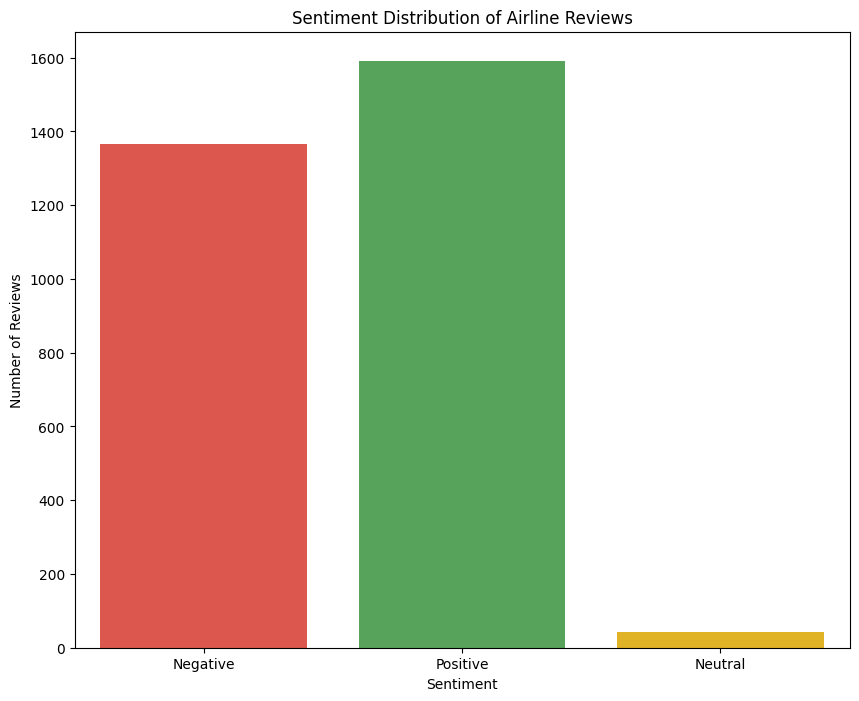

In [ ]:
#Visualising the sentiment distribution
plt.figure(figsize =(10, 8))
sns.countplot(x='Sentiment_Label', data=reviews_df, palette=colours_sentiment)
plt.title('Sentiment Distribution of Airline Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

So turns out better half of the reviews are positive, which is good, but still the number of negative reviews is quite decent

##Analysing most occuring words in Negative and Positive Reviews

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#seperating negative reviews from positive
neg_reviews = reviews_df[reviews_df['Sentiment_Label'] == 'Negative']
pos_reviews = reviews_df[reviews_df['Sentiment_Label'] == 'Positive']

In [ ]:
neg_reviews.head()

,Review,Sentiment_Score,Sentiment_Label
0,"The flight time was changed at the last minute without warning and no assistance was provided by the ground staff (3rd party agents) regarding the impact for the delay, nor was any help forthcomin...",-0.6747,Negative
1,"I'm so fraustrated. My flight was cancelled last minute, which wasn't the end of the world, even though the earliest I could get re-booked was three days later. It's the insane saga of events that...",-0.9217,Negative
2,We have sat on this plane for an hour and forty five minutes awaiting takeoff due to bad weather in London. This is understandable for safety. Fortunately I have a long layover so this delay does ...,-0.8364,Negative
3,"British Airways stranding my wife and I at Heathrow Airport for 2.5 days, with no access to our baggage. We we told by airline employees to purchase any necessities (toiletries, refreshments, etc....",-0.7506,Negative
4,"Although like many these days, I avoid BA on long haul from London Heathrow due to my perception of poor service and lack of customer services if things go wrong, I was pleasantly surprised by my ...",-0.7569,Negative


In [ ]:
pos_reviews.head()

,Review,Sentiment_Score,Sentiment_Label
5,"This flight was British Airways at its very best. The flight attendants were outstanding - processional, attentive and helpful. The food was very good and the seat/lie flat bed was very comfortabl...",0.9833,Positive
9,"I was surprised to receive confirmation pre-flight that I had 69 kgs luggage allowance. This to be later confirmed as one at 23 kg checked in, another 23 kgs carry on for under seat, and a third 2...",0.9533,Positive
12,Singapore to Heathrow with BA. Two choices on this route A380 or 777-300. In economy and premium (and first) there isn’t much in it. In club world the 777 wins as it has the suite. Check in was ea...,0.9844,Positive
15,"The flight wasn’t that bad, although the Inflight entertainment wasn’t great, the screen was very old-fashioned. It was hard to operate in the dark as the touch screen wasn’t working at times. The...",0.8737,Positive
17,"I was very impressed with their efficient boarding, the relatively (compared to Air Canada) comfortable seats and the quality of the food. Drinks and snacks frequently offered. Overall a no fuss, ...",0.8811,Positive


In [ ]:
#I will analyse the most occuring sequenc of two and three words for both negative and positive reviews
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = bigram_vectorizer.fit_transform(neg_reviews['Review'])
bigrams_neg = bigram_vectorizer.get_feature_names_out()
bigram_counts = X_bigram.sum(axis=0)
bigram_freq = [(bigrams_neg[i], bigram_counts[0, i]) for i in range(len(bigrams_neg))]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

print(bigram_freq[:10])

[('british airways', 998), ('business class', 491), ('customer service', 310), ('london heathrow', 265), ('cabin crew', 228), ('premium economy', 128), ('return flight', 124), ('connecting flight', 114), ('flight delayed', 96), ('hour flight', 94)]


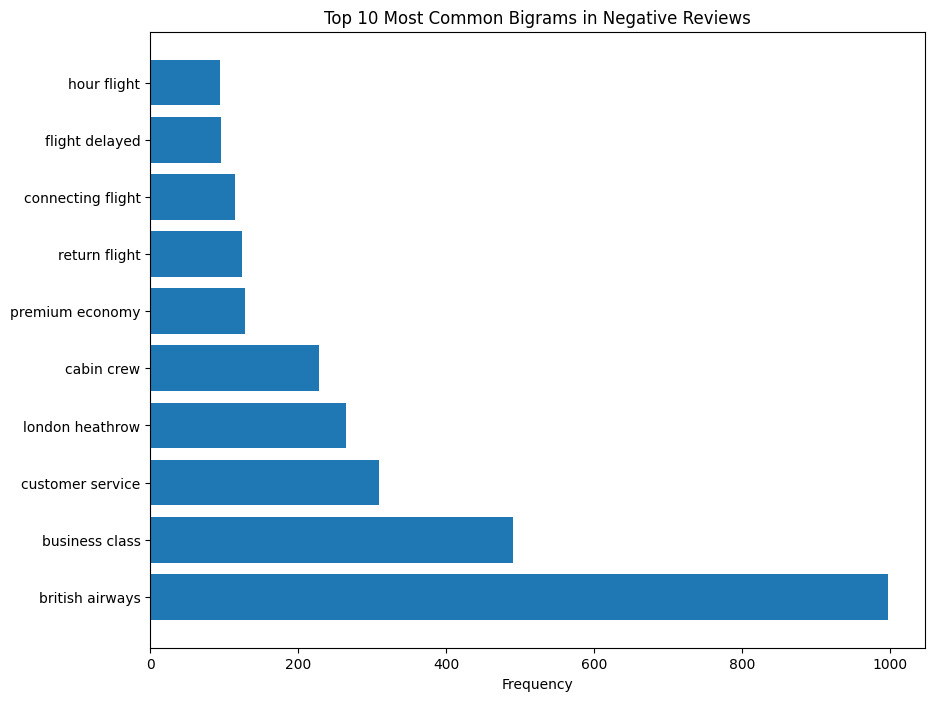

In [ ]:
plt.figure(figsize = (10, 8))
bigrams, counts = zip(*bigram_freq[:10])
plt.barh(bigrams, counts)
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Bigrams in Negative Reviews')
plt.show()

In [ ]:
#now trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_trigram = trigram_vectorizer.fit_transform(neg_reviews['Review'])
trigrams_neg = trigram_vectorizer.get_feature_names_out()
trigram_counts = X_trigram.sum(axis=0)
trigram_freq = [(trigrams_neg[i], trigram_counts[0, i]) for i in range(len(trigrams_neg))]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)


print(trigram_freq[:20])

[('fly british airways', 47), ('british airways flight', 43), ('business class seats', 33), ('flew british airways', 33), ('london british airways', 31), ('british airways business', 28), ('heathrow british airways', 28), ('ba customer service', 27), ('airways business class', 26), ('business class passengers', 24), ('flight delayed hours', 23), ('long haul flight', 23), ('flight british airways', 22), ('flying british airways', 21), ('business class seat', 20), ('london heathrow british', 20), ('missed connecting flight', 19), ('british airways customer', 18), ('low cost airline', 18), ('british airways london', 17)]


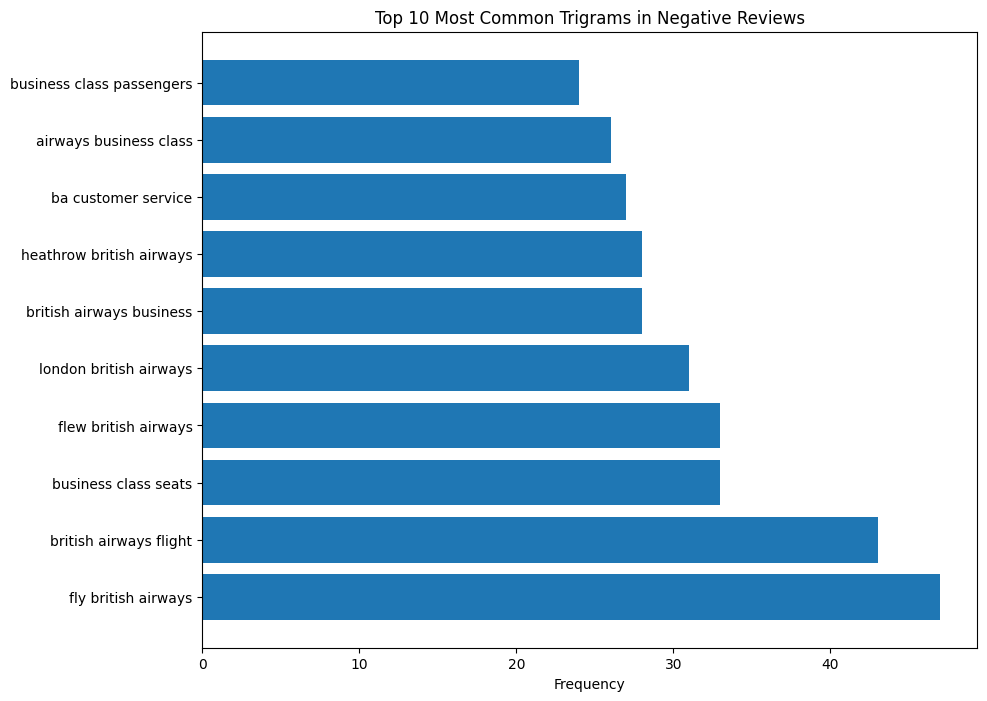

In [ ]:
plt.figure(figsize = (10, 8))
trigrams, counts = zip(*trigram_freq[:10])
plt.barh(trigrams, counts)
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Trigrams in Negative Reviews')
plt.show()

In [ ]:
#same now for positive reviews
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = bigram_vectorizer.fit_transform(pos_reviews['Review'])
bigrams_pos = bigram_vectorizer.get_feature_names_out()
bigram_counts = X_bigram.sum(axis=0)
bigram_freq = [(bigrams_pos[i], bigram_counts[0, i]) for i in range(len(bigrams_pos))]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

print(bigram_freq[:10])

[('british airways', 1006), ('business class', 463), ('cabin crew', 455), ('london heathrow', 388), ('premium economy', 190), ('club world', 175), ('long haul', 138), ('club europe', 136), ('return flight', 118), ('leg room', 117)]


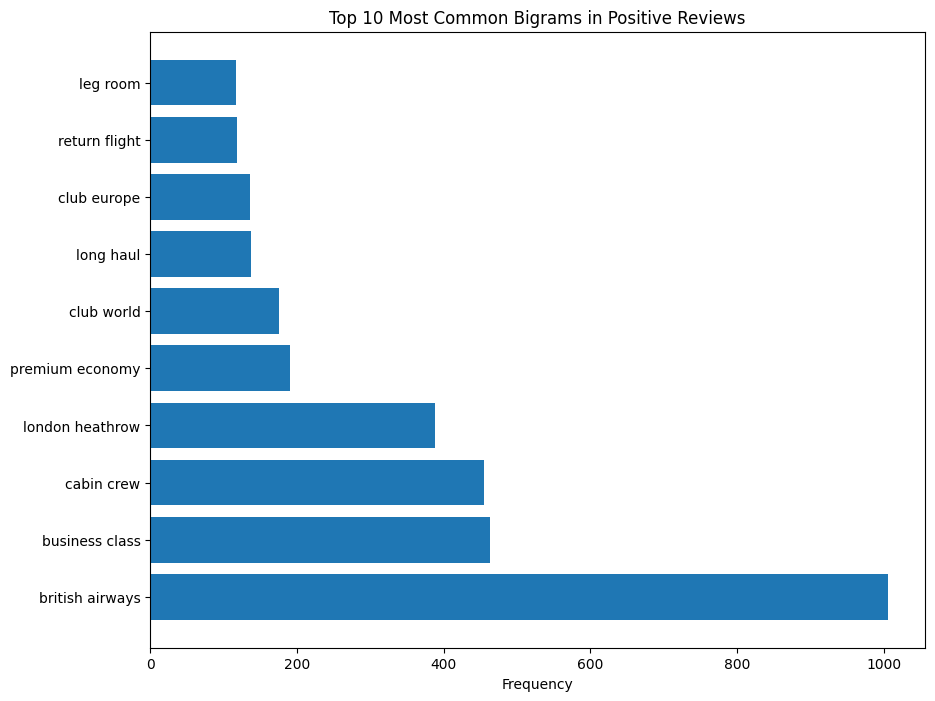

In [ ]:
plt.figure(figsize = (10, 8))
bigrams, counts = zip(*bigram_freq[:10])
plt.barh(bigrams, counts)
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Bigrams in Positive Reviews')
plt.show()

In [ ]:
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_trigram = trigram_vectorizer.fit_transform(pos_reviews['Review'])
trigrams_pos = trigram_vectorizer.get_feature_names_out()
trigram_counts = X_trigram.sum(axis=0)
trigram_freq = [(trigrams_pos[i], trigram_counts[0, i]) for i in range(len(trigrams_pos))]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)

print(trigram_freq[:10])

[('flew british airways', 60), ('heathrow british airways', 44), ('british airways flight', 41), ('world traveller plus', 34), ('cabin crew friendly', 31), ('flight british airways', 31), ('flying british airways', 28), ('british airways london', 27), ('business class seats', 27), ('london heathrow british', 27)]


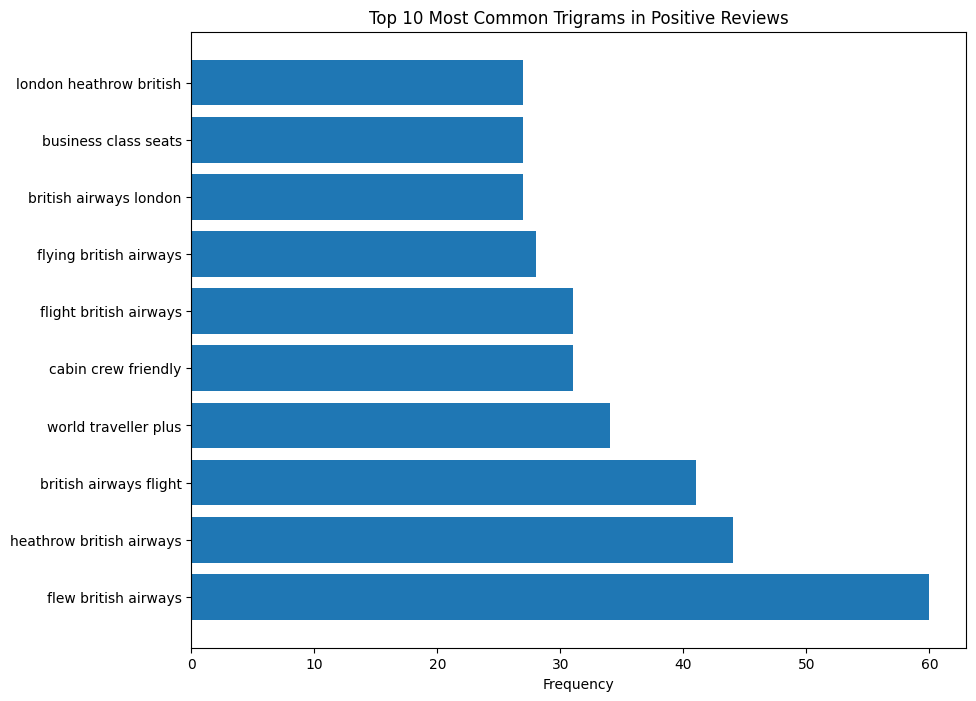

In [ ]:
plt.figure(figsize = (10, 8))
trigrams, counts = zip(*trigram_freq[:10])
plt.barh(trigrams, counts)
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Trigrams in Positive Reviews')
plt.show()

##Topic Modelling for Negative Reviews

In [ ]:
#Also decided to do topic modelling, which identifies the most important topics in a set of texts or docs, in this case for negative reviews, I will be using a pretrained model LDA
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(stop_words='english')

X_neg = vectorizer.fit_transform(neg_reviews['Review'])

In [ ]:
#top 5 topics
lda_neg = LatentDirichletAllocation(n_components=5, random_state=42)
lda_neg.fit(X_neg)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
words_neg = vectorizer.get_feature_names_out()
print("\nTopics in Negative Reviews:")
for topic_idx, topic in enumerate(lda_neg.components_):
    print(f"Topic {topic_idx + 1}:")
    print([words_neg[i] for i in topic.argsort()[-20:]])


Topics in Negative Reviews:
Topic 1:
['premium', 'time', 'poor', 'heathrow', 'staff', 'crew', 'airline', 'economy', 'london', 'business', 'cabin', 'food', 'class', 'seats', 'service', 'airways', 'british', 'seat', 'flight', 'ba']
Topic 2:
['lhr', 'left', 'seat', 'queue', 'club', 'food', 'time', 'gate', 'staff', 'minutes', 'crew', 'economy', 'passengers', 'boarding', 'ba', 'check', 'lounge', 'flight', 'business', 'class']
Topic 3:
['luggage', 'hour', 'seat', 'airline', 'time', 'heathrow', 'poor', 'class', 'service', 'meal', 'seats', 'staff', 'plane', 'crew', 'ba', 'cabin', 'boarding', 'london', 'food', 'flight']
Topic 4:
['good', 'boarding', 'meal', 'club', 'london', 'seat', 'just', 'heathrow', 'aircraft', 'staff', 'business', 'time', 'class', 'passengers', 'food', 'cabin', 'service', 'crew', 'ba', 'flight']
Topic 5:
['refund', 'flights', 'luggage', 'heathrow', 'did', 'day', 'booked', 'cancelled', 'time', 'check', 'airport', 'service', 'customer', 'hours', 'told', 'airways', 'london', 

##Exploratory Data Analysis

In [ ]:
df

,Aircraft,Traveller type,Seat type,Seat comfort,Cabin service,Food,Entertainment,Ground service,Internet,Value for money,Overall,Recommended
0,A320,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,1.0,NaN,1,1.0,no
1,NaN,Family Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,no
2,NaN,Solo Leisure,Economy Class,2.0,1.0,1.0,NaN,3.0,NaN,1,1.0,no
3,NaN,Family Leisure,Economy Class,2.0,3.0,2.0,3.0,1.0,1.0,3,1.0,no
4,A321,Family Leisure,Economy Class,3.0,2.0,NaN,NaN,5.0,NaN,5,4.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Boeing 777,Couple Leisure,Business Class,3.0,5.0,3.0,3.0,3.0,NaN,3,7.0,yes
2996,Boeing 767,Couple Leisure,Business Class,1.0,3.0,2.0,3.0,3.0,NaN,1,1.0,no
2997,NaN,Couple Leisure,Economy Class,5.0,5.0,4.0,1.0,5.0,1.0,4,9.0,yes
2998,Boeing 747,Family Leisure,Business Class,5.0,5.0,5.0,5.0,5.0,NaN,5,10.0,yes


In [ ]:
df.isnull().sum()

,0
Aircraft,1066
Traveller type,3
Seat type,0
Seat comfort,125
Cabin service,140
Food,426
Entertainment,1193
Ground service,69
Internet,2332
Value for money,0


In [ ]:
cols = ['Seat comfort', 'Cabin service', 'Food', 'Entertainment', 'Ground service', 'Internet', 'Value for money']
for col in cols:
  mean = df[col].mean().round(2)
  print(f'Avg rating for {col}: ', mean)

Avg rating for Seat comfort:  2.77
Avg rating for Cabin service:  3.15
Avg rating for Food:  2.58
Avg rating for Entertainment:  2.64
Avg rating for Ground service:  2.75
Avg rating for Internet:  1.91
Avg rating for Value for money:  2.5


In [ ]:
#There are too many missing values in the rating for Internet and Entertainment, Aircraft columns, so I have decided to drop these columns
df.drop(columns=['Aircraft', 'Internet', 'Entertainment'], axis = 1, inplace = True) #already checked the mean rating for those too and both seem to need to be improved

In [ ]:
columns_to_fill = ['Seat comfort', 'Cabin service', 'Food', 'Ground service']
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean()).round(2)

In [ ]:
print(df['Traveller type'].nunique()) #too many unique values and also enough nulls
print(df['Seat type'].nunique()) #too many unique values and also enough nulls

4
4


In [ ]:
df.isnull().sum()

,0
Traveller type,3
Seat type,0
Seat comfort,0
Cabin service,0
Food,0
Ground service,0
Value for money,0
Overall,0
Recommended,0


In [ ]:
df.dropna(inplace=True) #we will drop 3 rows where traveller types are missing and basically will be done with the null handling

In [ ]:
df.isnull().sum()

,0
Traveller type,0
Seat type,0
Seat comfort,0
Cabin service,0
Food,0
Ground service,0
Value for money,0
Overall,0
Recommended,0


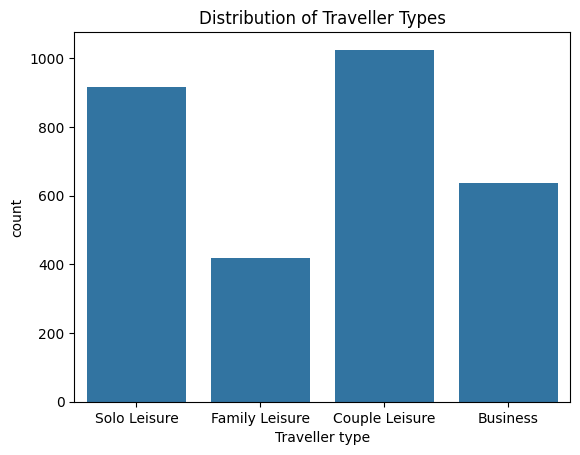

In [ ]:
#first let's explore categorical data
sns.countplot(x='Traveller type', data=df)
plt.title('Distribution of Traveller Types')
plt.show()

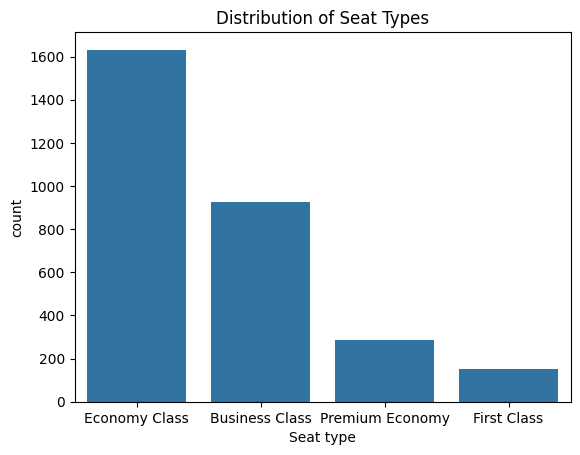

In [ ]:
sns.countplot(x='Seat type', data=df)
plt.title('Distribution of Seat Types')
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df['Traveller type'], prefix='Traveller_type', drop_first=True)
df_encoded = df_encoded.astype(int)

df = pd.concat([df, df_encoded], axis=1)

df = df.drop('Traveller type', axis=1)

In [ ]:
df_encoded = pd.get_dummies(df['Seat type'], prefix='Seat_type', drop_first=True)
df_encoded = df_encoded.astype(int)

df = pd.concat([df, df_encoded], axis=1)

df = df.drop('Seat type', axis=1)

In [ ]:
df

,Seat comfort,Cabin service,Food,Ground service,Value for money,Overall,Recommended,Traveller_type_Couple Leisure,Traveller_type_Family Leisure,Traveller_type_Solo Leisure,Seat_type_Economy Class,Seat_type_First Class,Seat_type_Premium Economy
0,2.0,2.0,1.00,1.0,1,1.0,no,0,0,1,1,0,0
1,1.0,1.0,1.00,1.0,1,1.0,no,0,1,0,1,0,0
2,2.0,1.0,1.00,3.0,1,1.0,no,0,0,1,1,0,0
3,2.0,3.0,2.00,1.0,3,1.0,no,0,1,0,1,0,0
4,3.0,2.0,2.58,5.0,5,4.0,no,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3.0,5.0,3.00,3.0,3,7.0,yes,1,0,0,0,0,0
2996,1.0,3.0,2.00,3.0,1,1.0,no,1,0,0,0,0,0
2997,5.0,5.0,4.00,5.0,4,9.0,yes,1,0,0,1,0,0
2998,5.0,5.0,5.00,5.0,5,10.0,yes,0,1,0,0,0,0


In [ ]:
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
df

,Seat comfort,Cabin service,Food,Ground service,Value for money,Overall,Recommended,Traveller_type_Couple Leisure,Traveller_type_Family Leisure,Traveller_type_Solo Leisure,Seat_type_Economy Class,Seat_type_First Class,Seat_type_Premium Economy
0,2.0,2.0,1.00,1.0,1,1.0,0,0,0,1,1,0,0
1,1.0,1.0,1.00,1.0,1,1.0,0,0,1,0,1,0,0
2,2.0,1.0,1.00,3.0,1,1.0,0,0,0,1,1,0,0
3,2.0,3.0,2.00,1.0,3,1.0,0,0,1,0,1,0,0
4,3.0,2.0,2.58,5.0,5,4.0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3.0,5.0,3.00,3.0,3,7.0,1,1,0,0,0,0,0
2996,1.0,3.0,2.00,3.0,1,1.0,0,1,0,0,0,0,0
2997,5.0,5.0,4.00,5.0,4,9.0,1,1,0,0,1,0,0
2998,5.0,5.0,5.00,5.0,5,10.0,1,0,1,0,0,0,0


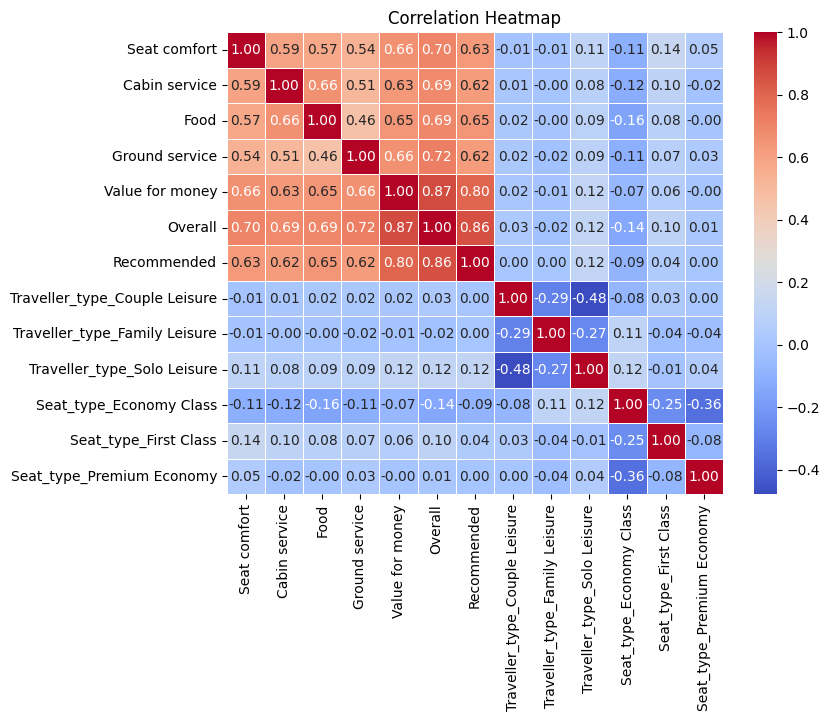

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()